# _Modeling of Qubit Chain_

## _Simulation of few steps of quantum walk_

<img src="images/line_qubits_site1.png" alt="Qubit Chain">

<img src="images/line_qubits_site.png" alt="Qubit Chain Shift">

### Contributor
Alexander Yu. Vlasov
***

The initial part is similar with [previous notebook](qubit_chain_mod.ipynb), but only circuit
for one step without measurements is implemented. Parameter `n_step` is used in next part
of program discussed below.

In [1]:
from pprint import pprint
import math
import numpy as np

# importing the Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

# Definition of matchgate

def gate_mu3(qcirc,theta,phi,lam,a,b):
    qcirc.cx(a,b)
    qcirc.cu3(theta,phi,lam,b,a)
    qcirc.cx(a,b)
    

n_nodes = 5 
n_step = 3

# Creating Registers
qr = QuantumRegister(n_nodes) 
cr = ClassicalRegister(n_nodes)

# Creating Circuits
qc = QuantumCircuit(qr,cr)


# Creating of two partitions with M1' and M2
for i in range(0,n_nodes-1,2):
    gate_mu3(qc,math.pi, math.pi, 0, qr[i], qr[i+1])
for i in range(1,n_nodes,2):
    gate_mu3(qc,math.pi/2, 0, 0, qr[i], qr[i+1])



The method used here may be applied only for simulator and 
similar with already used in a [Qiskit tutorial](https://github.com/Qiskit/qiskit-tutorial) about 
[visualization of quantum state](../../../qiskit/basics/qiskit_visualizations.ipynb).
The `unitary_simulator` backend is used to produce $2^n \times 2^n$ unitary matrix
QWalk representing quantum circuit, where $n$ is `n_nodes`. 
The complex vector with $2^n$ is initialized as initial state, 
e.g., $|\psi_0\rangle = |00001\rangle$.
Multiplication of QWalk on such a vector produces final state also with $2^n$ components
$|\psi_1\rangle = Q_{\rm Walk} |\psi_0\rangle$. 
The density matrix $\rho_1 = |\psi_1\rangle\!\langle\psi_1|$ for such a state is calculated and used for Quantum Sphere.
Unlike of real hardware the state is not destroyed due to measurement and may
be again used as initial state $|\psi_{k+1}\rangle = Q_{\rm Walk} |\psi_k\rangle$. 
So, the Quantum Spheres are drawn for $\rho_k = |\psi_k\rangle\!\langle\psi_k|$ after each step
of quantum walk without initialization.


step =  1
The 0th eigenvalue = 1.0000000000000004


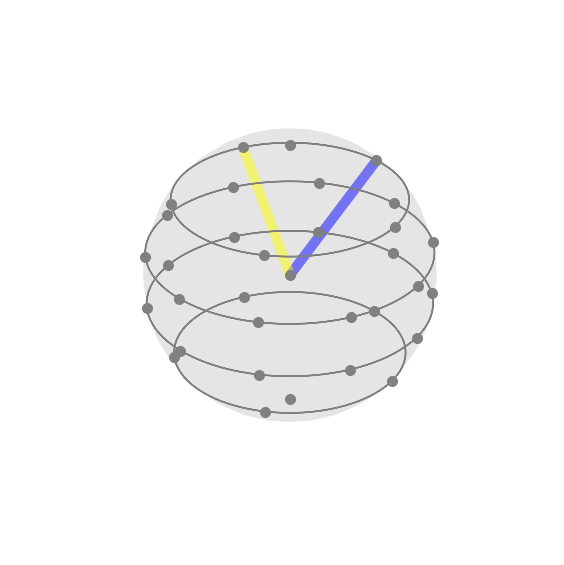

step =  2
The 0th eigenvalue = 1.0000000000000009


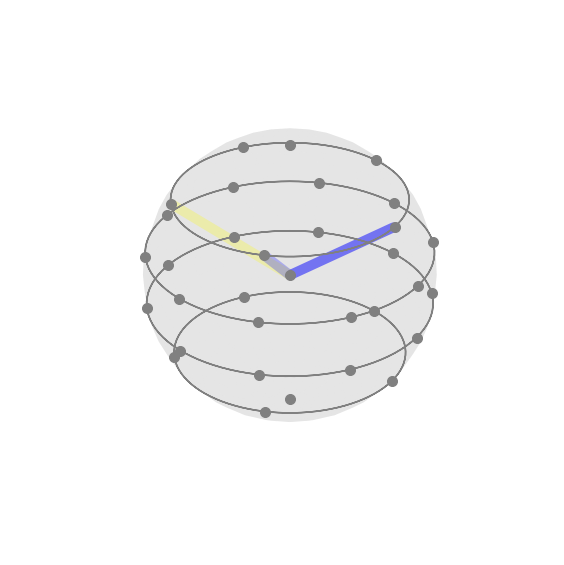

step =  3
The 0th eigenvalue = 1.0000000000000013


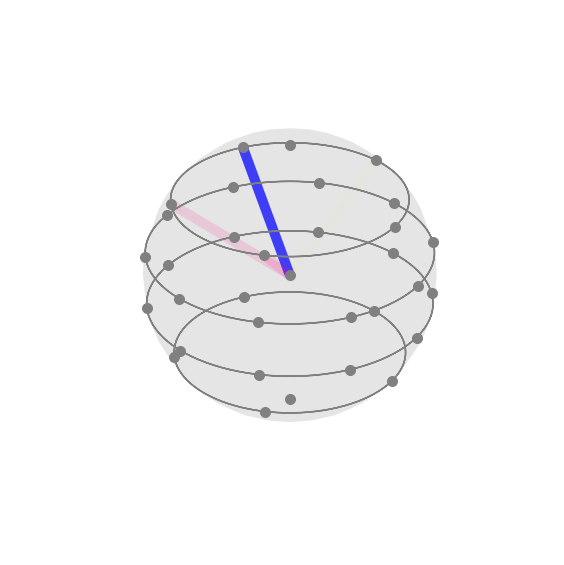

In [2]:
# execute the quantum circuit 
backend = 'unitary_simulator' # the device to run on

job = execute(qc, Aer.get_backend(backend)) # Execute quantum walk 
result = job.result()


initial_state = np.zeros(2**n_nodes)
initial_state[1]=1.0 # state 0 = ....0000, state 1 = ...000001

QWalk = result.get_data(qc)['unitary']

#Applying QWalk n_step times
for i in range(0,n_step):
    if i > 0: initial_state = np.copy(state_QWalk) # Copy previous state
    state_QWalk = np.dot(QWalk,initial_state)      # Multiply on QWalk matrix
    rho_QWalk=np.outer(state_QWalk, state_QWalk.conj()) # Calculate density matrix
    print('step = ',i+1)                           # print number
    plot_state(rho_QWalk,'qsphere')                # draw Quantum Sphere
    

The method used above is possible _only for simulation_. 
Real hardware _should not_ use result of previous step altered due to measurement. 
So, for $n$ steps of walk it is necessary to make $n$ different experiments with
`n_step`=$1,2,\dots,n$ 
and each such attempt could include additional series of runs to provide 
[state tomography](../../../qiskit/ignis/state_tomography.ipynb)
for whole process of quantum walk.
